##### Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [141]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# @ BANK DATA


In [142]:
bk=pd.read_csv('book.csv')

In [143]:
bk

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [144]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [145]:
#the given data is in the transcition format and hence pre-proccessing is not required

# Apriori Algorithm

## 1.Association rules with 10% Support and 40% confidence

In [146]:
frequent_itemsets=apriori(bk,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [147]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
65,"(CookBks, GeogBks)",(DoItYBks),0.1925,0.2820,0.1085,0.563636,1.998711,0.054215,1.645417
66,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
67,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
68,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


### lift value range will be [0 inf]
##### A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [148]:
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
59,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
63,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
66,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
40,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
62,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
12,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
11,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505
13,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


In [149]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
65,"(CookBks, GeogBks)",(DoItYBks),0.1925,0.2820,0.1085,0.563636,1.998711,0.054215,1.645417
66,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
67,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
68,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


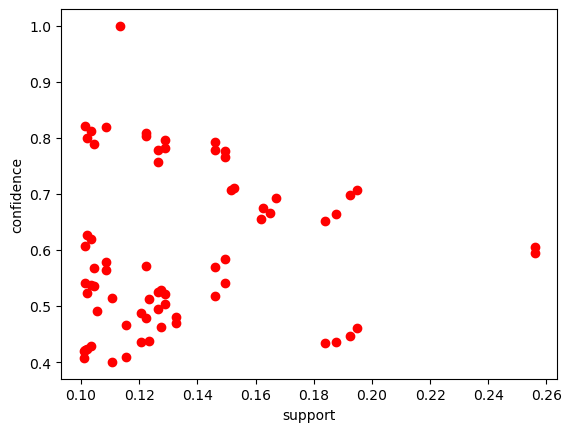

In [180]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'],c='r',edgecolors='red')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 2.Association rules with 5% Support and 70% confidence

In [151]:
frequent_itemsets1=apriori(bk,min_support=0.05,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, GeogBks, CookBks, YouthBks)"


In [152]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.7)

rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(YouthBks, DoItYBks, CookBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(YouthBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, ChildBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, DoItYBks, CookBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [153]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.256,0.0525,0.820312,3.204346,0.036116,4.140522
83,"(YouthBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
21,(ItalCook),"(ChildBks, CookBks)",0.1135,0.256,0.0850,0.748899,2.925385,0.055944,2.962947
86,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.256,0.0535,0.732877,2.862800,0.034812,2.785231
69,"(RefBks, GeogBks)","(ChildBks, CookBks)",0.1105,0.256,0.0785,0.710407,2.775028,0.050212,2.569125
...,...,...,...,...,...,...,...,...,...
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
20,"(ItalCook, CookBks)",(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548


In [154]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(YouthBks, DoItYBks, CookBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(YouthBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, ChildBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, DoItYBks, CookBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


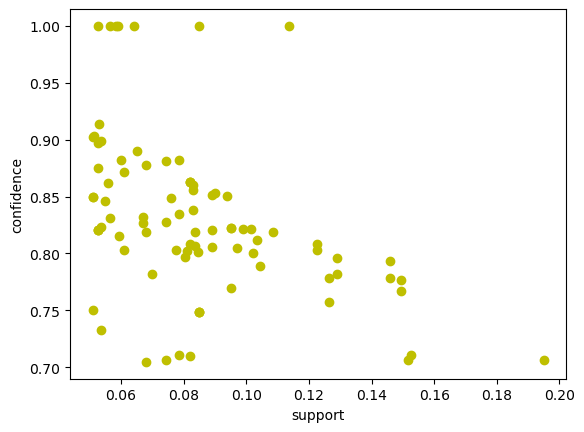

In [181]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'],c='y')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 3.Association rules with 2.5% Support and 85% confidence

In [156]:
frequent_itemsets2=apriori(bk,min_support=0.025,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
217,0.0255,"(GeogBks, RefBks, CookBks, ArtBks, YouthBks)"
218,0.0275,"(DoItYBks, GeogBks, RefBks, CookBks, ArtBks)"
219,0.0250,"(DoItYBks, ItalCook, CookBks, ItalArt, ArtBks)"
220,0.0270,"(ChildBks, DoItYBks, GeogBks, RefBks, CookBks,..."


In [157]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.85)

rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(YouthBks, RefBks)",(ChildBks),0.0965,0.4230,0.0830,0.860104,2.033342,0.042181,4.124481
4,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
...,...,...,...,...,...,...,...,...,...
114,"(ItalCook, DoItYBks, ItalArt)","(ArtBks, CookBks)",0.0250,0.1670,0.0250,1.000000,5.988024,0.020825,inf
115,"(ItalArt, DoItYBks, CookBks)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250
116,"(ChildBks, DoItYBks, GeogBks, RefBks, YouthBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.690000
117,"(DoItYBks, GeogBks, RefBks, CookBks, YouthBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.366500


In [158]:
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(ChildBks, ItalArt, CookBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000
115,"(ItalArt, DoItYBks, CookBks)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250
75,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
46,"(ChildBks, ItalArt, CookBks)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000
104,"(ArtBks, ChildBks, ItalArt, CookBks)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000
...,...,...,...,...,...,...,...,...,...
56,"(ArtBks, YouthBks, GeogBks)",(CookBks),0.0650,0.4310,0.0560,0.861538,1.998929,0.027985,4.109444
110,"(ArtBks, DoItYBks, RefBks, GeogBks)",(CookBks),0.0320,0.4310,0.0275,0.859375,1.993910,0.013708,4.046222
92,"(ChildBks, DoItYBks, RefBks, GeogBks)",(CookBks),0.0525,0.4310,0.0450,0.857143,1.988731,0.022373,3.983000
82,"(YouthBks, ChildBks, RefBks, GeogBks)",(CookBks),0.0515,0.4310,0.0440,0.854369,1.982295,0.021803,3.907133


In [159]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(YouthBks, RefBks)",(ChildBks),0.0965,0.4230,0.0830,0.860104,2.033342,0.042181,4.124481
4,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
...,...,...,...,...,...,...,...,...,...
114,"(ItalCook, DoItYBks, ItalArt)","(ArtBks, CookBks)",0.0250,0.1670,0.0250,1.000000,5.988024,0.020825,inf
115,"(ItalArt, DoItYBks, CookBks)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250
116,"(ChildBks, DoItYBks, GeogBks, RefBks, YouthBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.690000
117,"(DoItYBks, GeogBks, RefBks, CookBks, YouthBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.366500


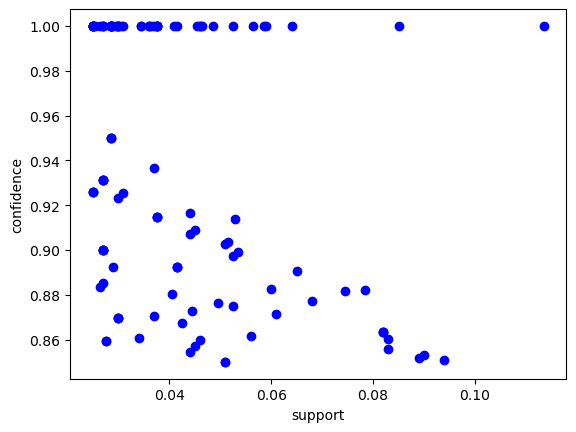

In [182]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'],c='b')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# @ MY_ MOVIES

In [161]:
mv=pd.read_csv("my_movies.csv")

In [162]:
mv

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [163]:
mv.shape

(10, 15)

In [164]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [167]:
mv2=mv.iloc[:,5:]
mv2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori algorithm

## 1.Association rules with 10% support and confidence 70%

In [168]:
frequent_itemsets_mv=apriori(mv2,min_support=0.1,use_colnames=True)
frequent_itemsets_mv

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [170]:
rules_mv = association_rules(frequent_itemsets_mv, metric="confidence", min_threshold=0.70)

rules_mv

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [171]:
rules_mv.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
87,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
85,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
84,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
112,"(Harry Potter1, Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
53,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
39,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
14,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [172]:
rules_mv[rules_mv.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


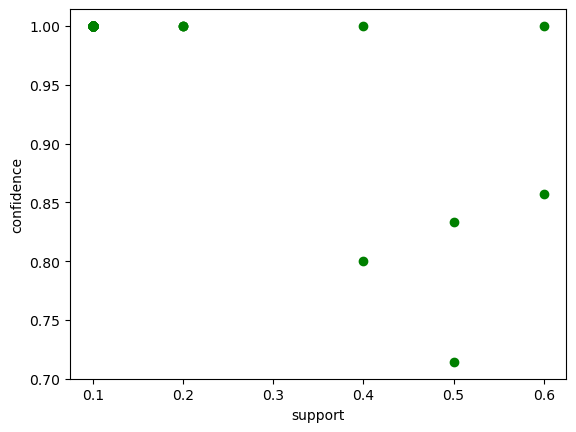

In [192]:
# visualization of obtained rule
plt.scatter(rules_mv['support'],rules_mv['confidence'],c='g')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 1.Association rules with 10% support and confidence 70%

In [168]:
frequent_itemsets_mv=apriori(mv2,min_support=0.1,use_colnames=True)
frequent_itemsets_mv

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [170]:
rules_mv = association_rules(frequent_itemsets_mv, metric="confidence", min_threshold=0.70)
rules_mv

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [171]:
rules_mv.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
87,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
85,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
84,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
112,"(Harry Potter1, Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
53,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
39,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
14,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [172]:
rules_mv[rules_mv.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


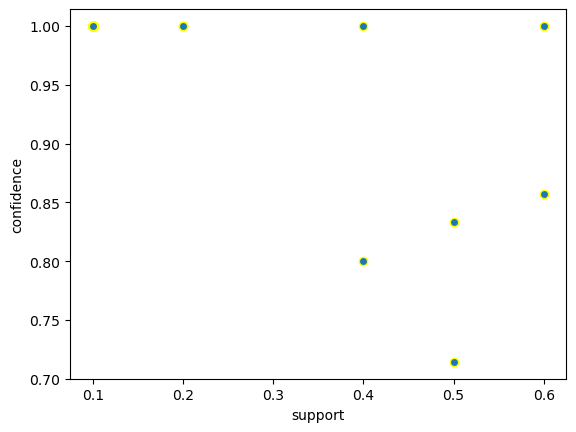

In [215]:
# visualization of obtained rule
plt.scatter(rules_mv['support'],rules_mv['confidence'],edgecolor='yellow')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 2.Association rules with 20% support and confidence 80%

In [193]:
frequent_itemsets_mv1=apriori(mv2,min_support=0.2,use_colnames=True)
frequent_itemsets_mv1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [194]:
rules_mv1 = association_rules(frequent_itemsets_mv1, metric="confidence", min_threshold=0.80)

rules_mv1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [195]:
rules_mv1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [196]:
rules_mv1[rules_mv1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


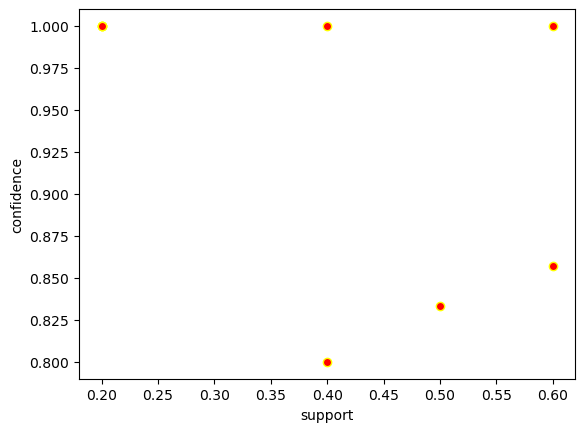

In [213]:
# visualization of obtained rule
plt.scatter(rules_mv1['support'],rules_mv1['confidence'],c='r',edgecolor='yellow')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 3.Association rules with 10% support and lift is 1.3

In [200]:
frequent_itemsets_mv2=apriori(mv2,min_support=0.1,use_colnames=True)
frequent_itemsets_mv2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [209]:
rules_mv2 = association_rules(frequent_itemsets_mv2, metric="lift", min_threshold=1.3)

rules_mv2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
1,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
225,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
226,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
227,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
228,(Sixth Sense),"(Green Mile, Harry Potter1, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [210]:
rules_mv2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
153,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
193,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
178,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
166,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
122,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
31,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
80,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
32,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
29,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [211]:
rules_mv2[rules_mv2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
1,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
225,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
226,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
227,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
228,(Sixth Sense),"(Green Mile, Harry Potter1, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


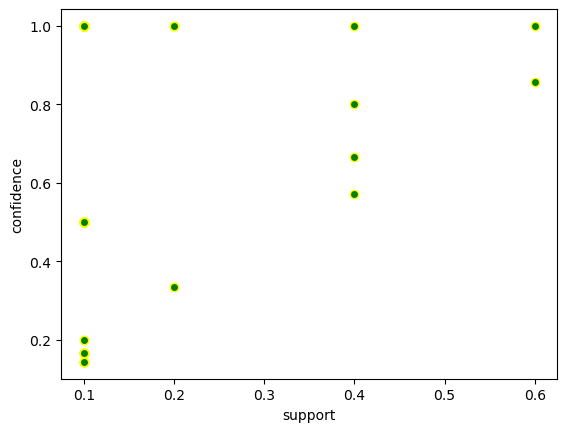

In [212]:
# visualization of obtained rule
plt.scatter(rules_mv2['support'],rules_mv2['confidence'],c='g',edgecolor='yellow')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()